In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')

# Integration Methods.

This notebook contains different numerical integration methods.

---

### Rectangle Rule.

The area is divided into rectangles of base $h$ and height $f(a), f(a+h), f(a+2h), ... f(a+Nh)$, where:

$$ h = \frac{b-a}{N} $$

and $N$ is the number of rectangles used; the larger it is, the more accurate the result. The value of $h$ is the step size.

---


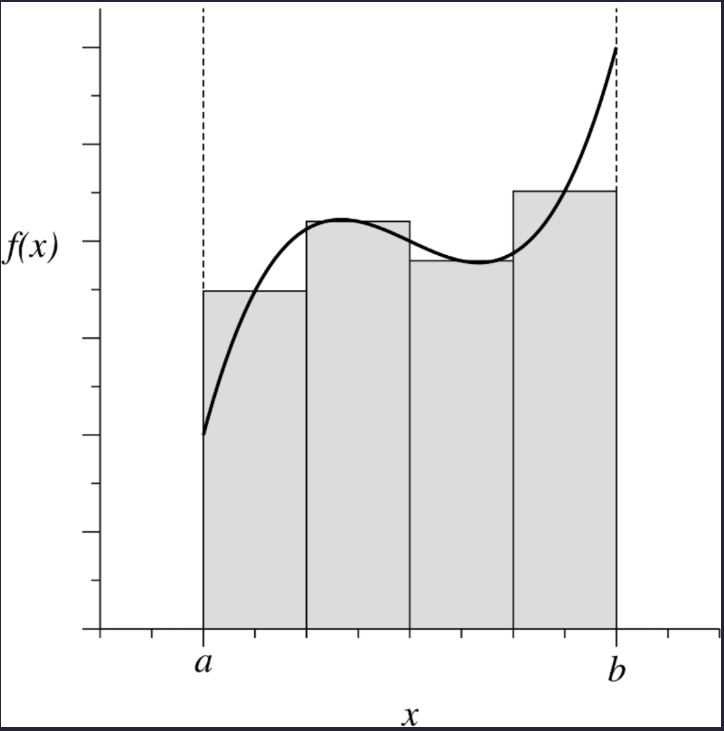

In [37]:
display(Image(filename ="int_rect.png", width=400, height=200))

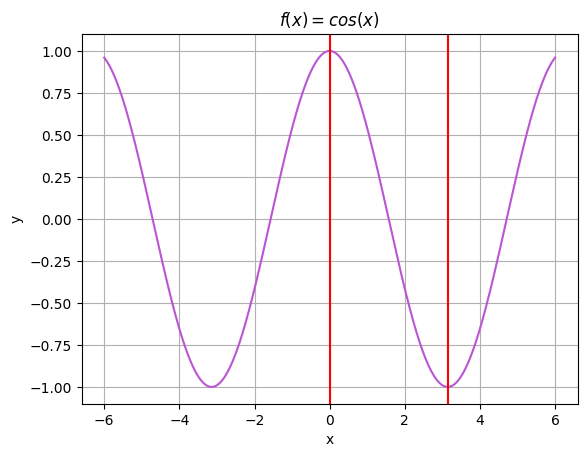

The value of the surface for the integral is 0 y 1.5708 es I = 1.0008


In [38]:
def I_rect(f, a, b, N):
    h = (b - a)/N
    I = 0
    for n in range(N):
        I += h*f(a + h*n)
    return I


def f(x):
    return np.cos(x)

x = np.linspace(-6, 6, 1000)
y = f(x)
plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title("$f(x) = cos(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.vlines(x = 0, ymin = -2, ymax = 2, color = 'red') 
plt.vlines(x = math.pi, ymin = -2, ymax = 2, color = 'red')
plt.ylim(-1.1, 1.1)
plt.show()

a = 0
b = math.pi/2
I = I_rect(f, a, b, 1000)
print(f'The value of the surface for the integral is {round(a, 4)} y {round(b, 4)} es I = {round(I, 4)}')

### Trapezoidal Rule.

Similar to the rectangle method, but the differential elements are approximated by trapezoids in order to obtain greater accuracy for function curves.

---


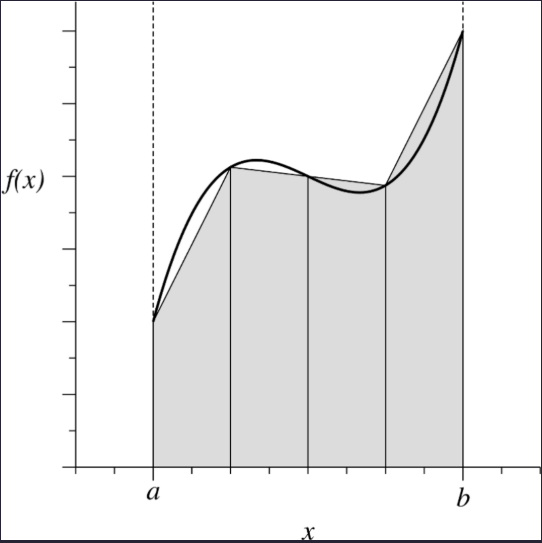

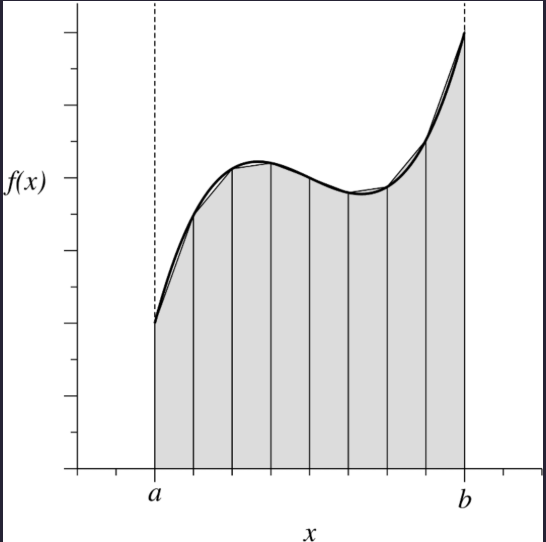

In [39]:
display(Image(filename ="int_trap0.png", width=450, height=450),\
        Image(filename ="int_trap1.png", width=450, height=450))

In [40]:
def I_trapeze(f, a, b, N):
    h = (b - a) / N
    I = (f(a) + f(b)) / 2
    for k in range(1, N):
        I += f(a + k*h)
    return I*h

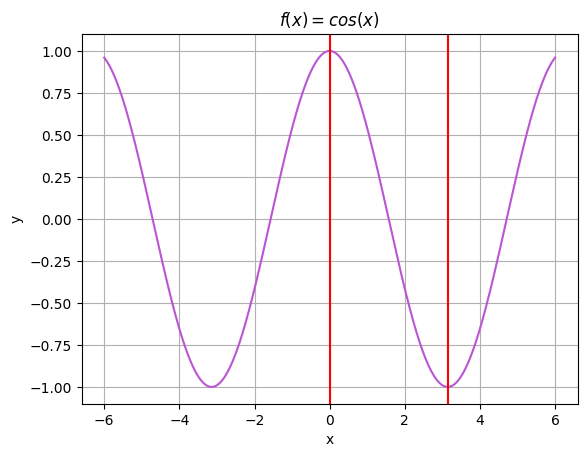

The value of the surface for the integral is 0 y 1.5708 es I = 1.0


In [41]:
x = np.linspace(-6, 6, 1000)
y = f(x)
plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title("$f(x) = cos(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.vlines(x = 0, ymin = -2, ymax = 2, color = 'red') 
plt.vlines(x = math.pi, ymin = -2, ymax = 2, color = 'red')
plt.ylim(-1.1, 1.1)
plt.show()

a = 0
b = math.pi/2
I = I_trapeze(f, a, b, 1000)
print(f'The value of the surface for the integral is {round(a, 4)} y {round(b, 4)} es I = {round(I, 4)}')

### Example: applying the trapezoidal rule

* Write a program that allows the integration of a given function over an interval using the trapezoidal rule.

* Apply it to the function $x^4-2x+1$ over the interval (0,2) with N=10.

* Compare with the exact result.

* Compute the value of $N$ that allows obtaining a precision $\epsilon<0.01 \%$

---

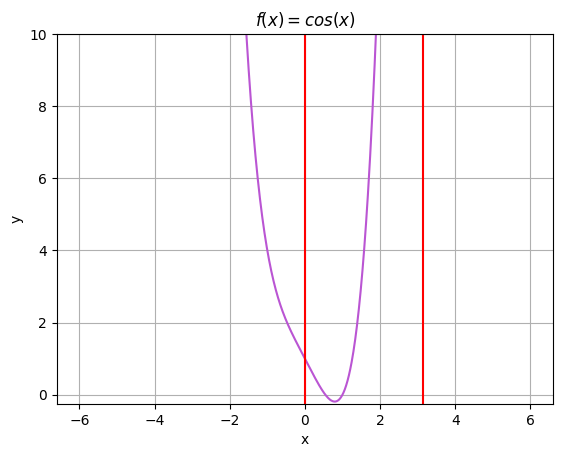

La superficie encerrada por la función entre 0 y 2 es I = 4.5066


In [42]:
def f(x):
    return x**4 - 2*x +1

x = np.linspace(-6, 6, 1000)
y = f(x)
plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title("$f(x) = cos(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.vlines(x = 0, ymin = -2, ymax = 10, color = 'red') 
plt.vlines(x = math.pi, ymin = -2, ymax = 10, color = 'red')
plt.ylim(-0.25, 10)
plt.show()

a = 0
b = 2
I = I_trapeze(f, a, b, 10)
print(f'La superficie encerrada por la función entre {round(a, 4)} y {round(b, 4)} es I = {round(I, 4)}')

In [43]:
def I_trapeze_error(f, a, b, Ia, eps):
    for i in range(1, 500):
        N = i
        A = I_trapeze(f, a, b, N)
        err = abs(1 - A/Ia)*100
        if err <= eps:
            break
    print(f"The value of the Integral is: {A}")
    print()
    print(f"The error of the calculation is: {err}")
    print()
    print(f"The number of intervals used is: {N}")
    return A,err,N
I, error, N = I_trapeze_error(f, 0, 2, 4.4, 0.01)

The value of the Integral is: 4.400438306329544

The error of the calculation is: 0.009961507489641974

The number of intervals used is: 156


### Exercise: integrating discrete values

The file "velocities.txt" contains the velocity of a particle moving along a straight line, measured second by second over the interval from 0 to 100.

1- Compute the distance traveled by the particle in each unit of time using the trapezoidal rule.  
2- Plot, on the same graph, the distance and the velocity of the particle as functions of time.

---

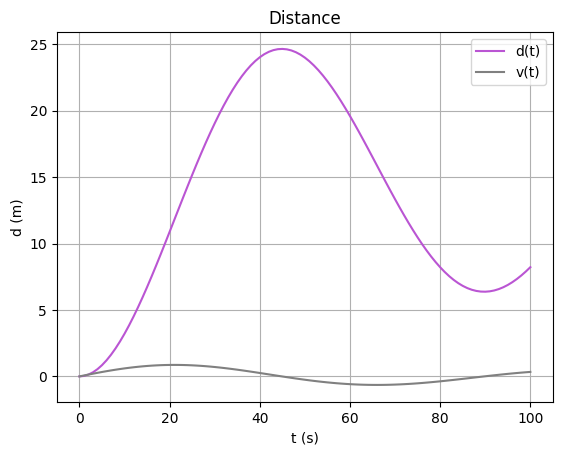

In [44]:
def velocity(time):
    data = np.loadtxt('velocities.txt')
    t = data[:, 0]
    v = data[:, 1]
    return v[int(time)]

def distance(time):
    data = np.loadtxt('velocities.txt')
    t, v = data[:, 0], data[:, 1]
    if time == 0:
        d = 0
    else:
        N = len(t[:int(time)])
        d = I_trapeze(velocity, 0, time, N)
    return d

t = list(range(0, 101))
d = list(map(distance, t))
vt=np.loadtxt('velocities.txt',float)
v=vt[:,1]
t=vt[:,0]
plt.plot(t, d, color = 'mediumorchid')
plt.plot(t, v, color = 'gray')
plt.legend(['d(t)', 'v(t)'])
plt.grid()
plt.title("Distance")
plt.xlabel('t (s)')
plt.ylabel('d (m)')
plt.show()

These two methods have different associated errors:

For the rectangle method, the error is:

$$\epsilon_\text{rect}=\vert I(a,b)-I(a,b)_\text{rect}\vert\sim {\cal O}(h).$$

And for the trapezoidal method:

$$\epsilon_\text{trap}=\frac{h^2}{12}\left(f'(a)-f'(b)\right)+{\cal O}(h^4)$$

---

### Simpson's Rule.

The trapezoidal rule approximates the area under a curve by replacing the curve over an interval with straight lines. This results in a first-order approximation. Therefore, a better approximation would be to replace each segment with quadratic curves:

$$A\,x^2+B\,x+C$$

Where now, in order to approximate each interval, we need three points. This is what is known as Simpson's rule:


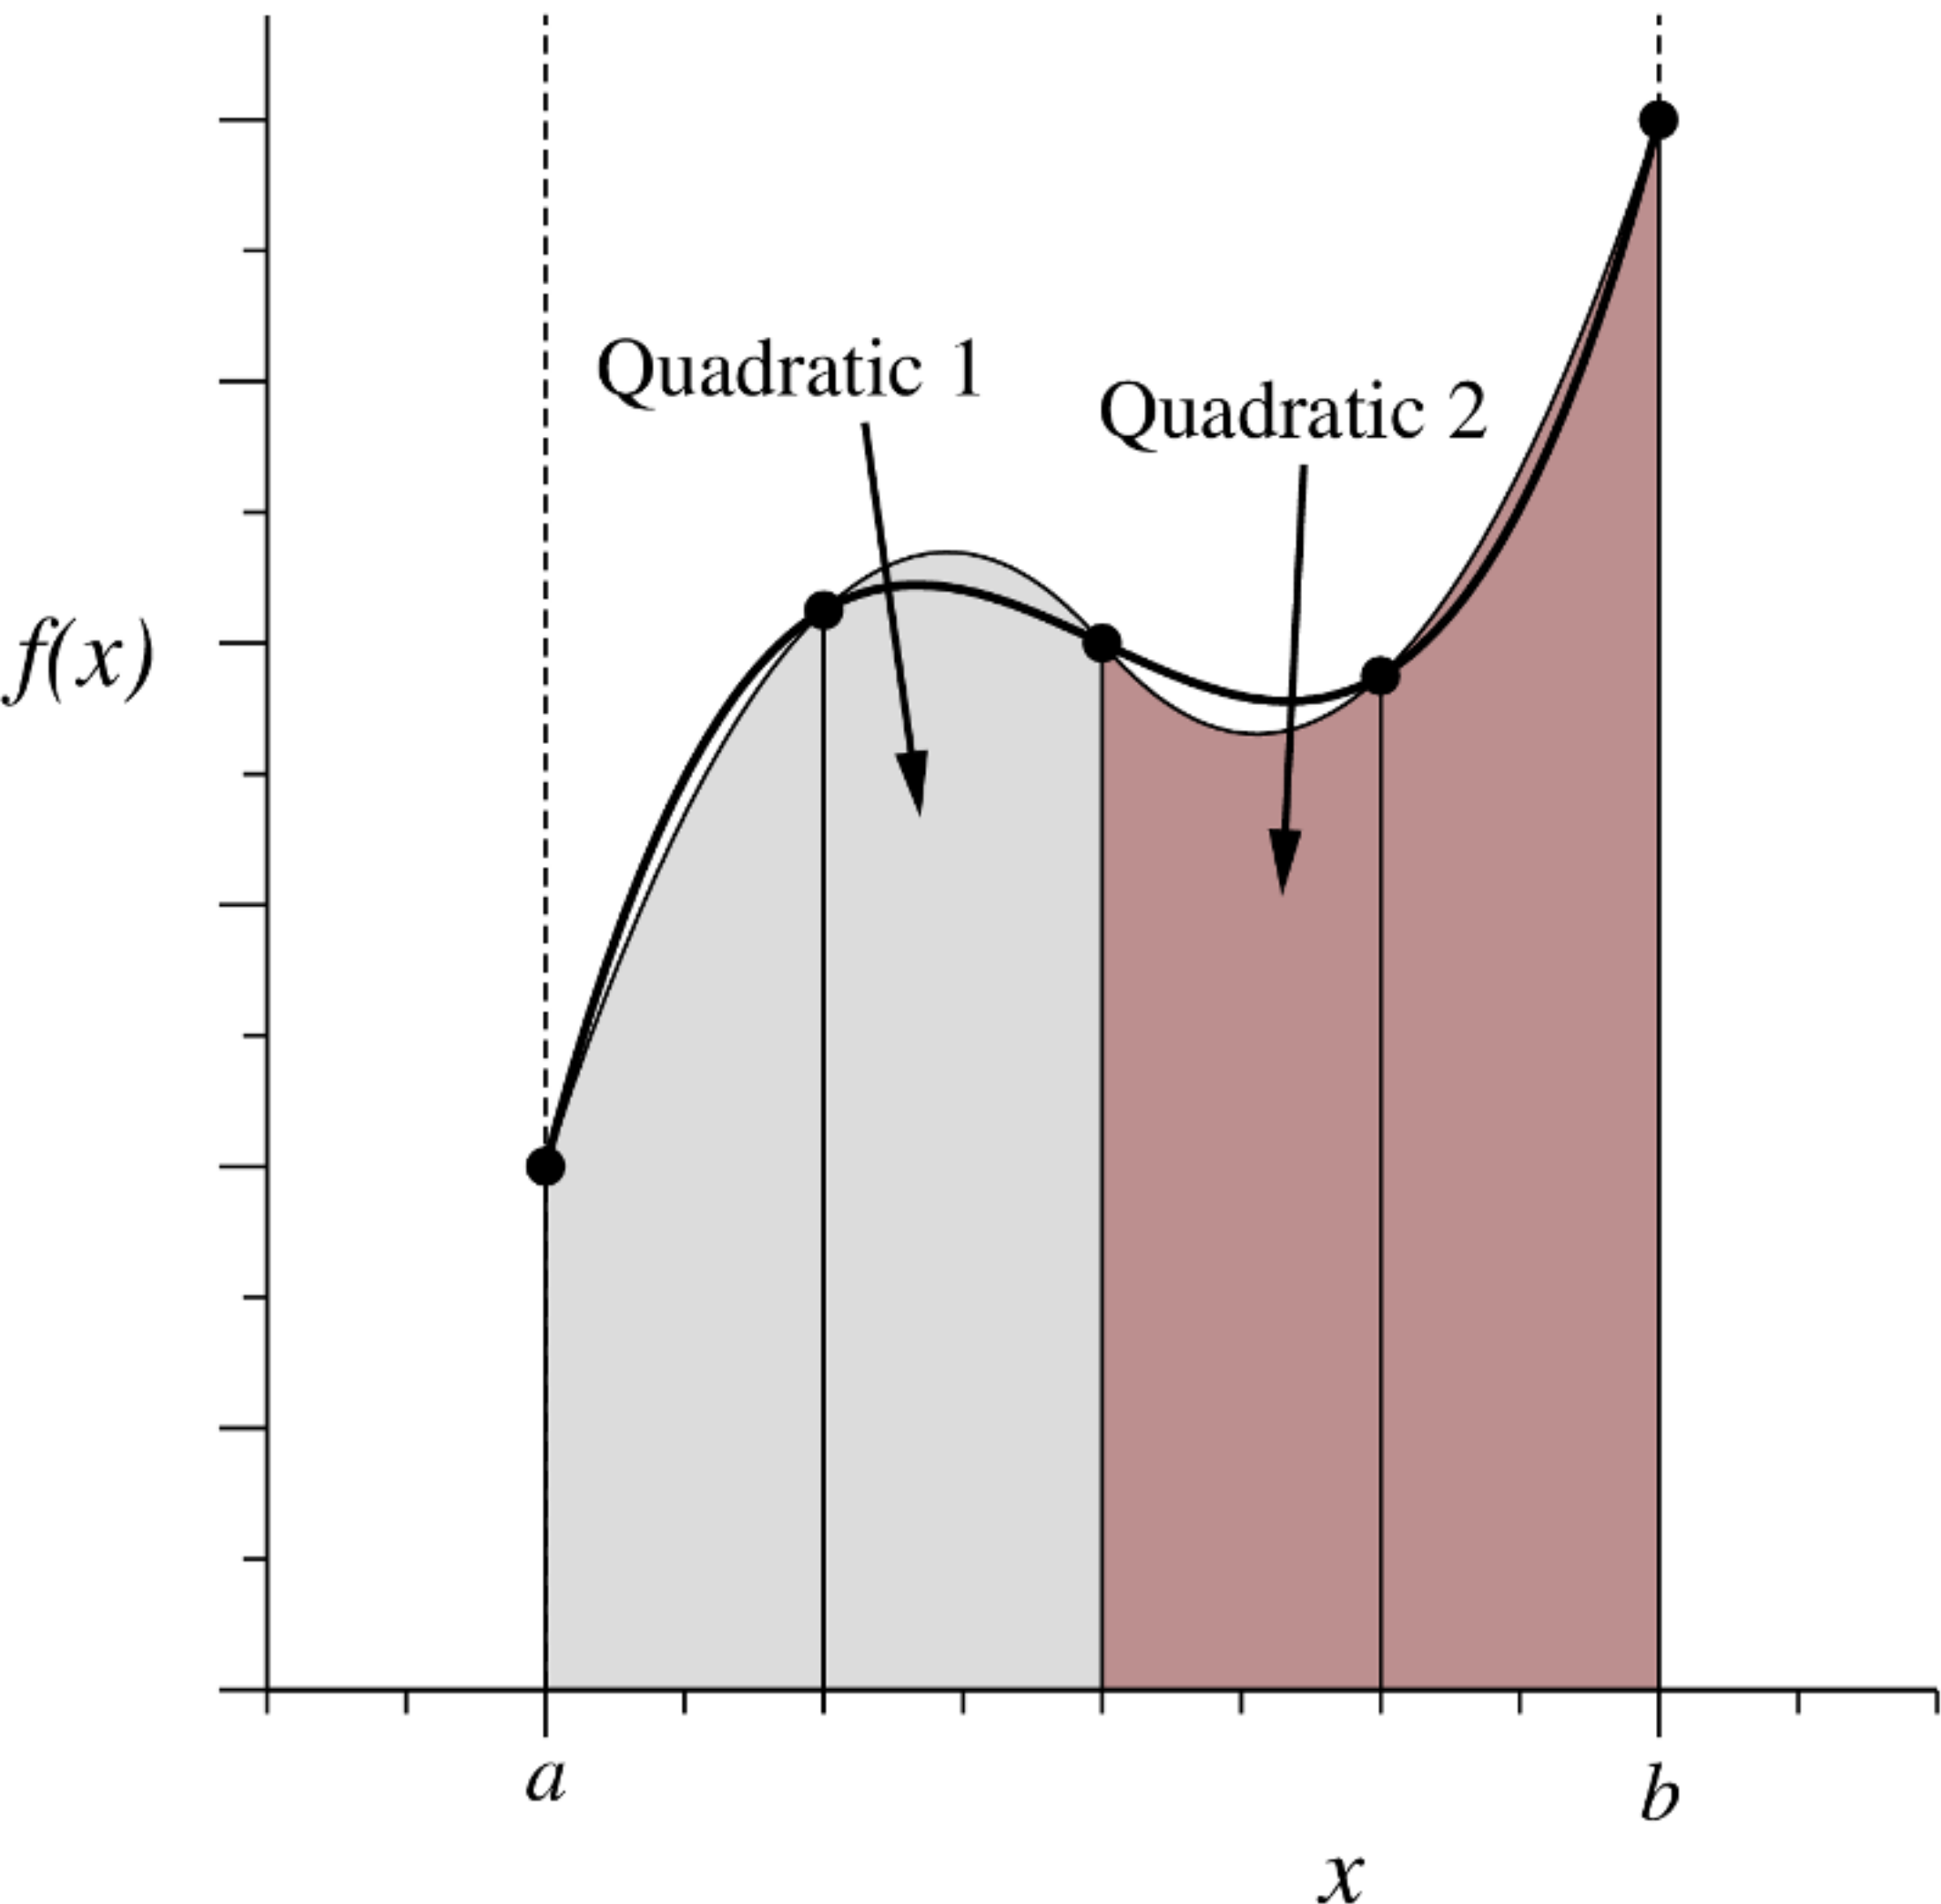

In [45]:
display(Image(filename ="int_simp.png", width=300, height=300))

* Taking the interval defined between the points x=-h and x=h, one has:

    $$f(-h)=A\,h^2 +B\,h +C,\quad f(0)=C,\quad f(h)=A\,h^2-B\,h+C$$

  which implies that:

    $$A=\frac{1}{2\,h^2}\left(f(-h)-2\,f(0)+f(h)\right),\quad B=\frac{1}{2h}\left(f(h)-f(-h)\right),\quad C= f(0),$$

   and its integral is:

    $$\int\limits_{-h}^h\left(A\,x^2+B\,x+C\right)\,\text{d}x = \frac{h}{3}\left(f(-h)+4f(0)+f(h)\right)$$
    
  which can be used for any three equally spaced points.


In [46]:
def I_simpson(f, a, b, N):
    if N%2 != 0:
        N += 1
    
    h = (b - a)/N
    I = f(a) + f(b) + 4*f(b - h)
    
    for k in range(1, N//2):
        I += 4*f(a + ((2*k - 1)*h)) + 2*f(a + 2*k*h)
    return I*h/3

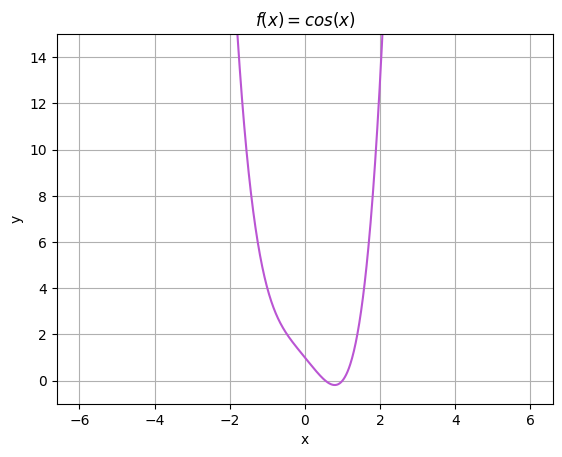

La superficie encerrada por la función entre 0 y 2 es I = 4.4004


In [47]:
def f(x):
    return x**4 -2*x +1

x = np.linspace(-6, 6, 1000)
y = f(x)
plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title("$f(x) = cos(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 15)
plt.show()

a = 0
b = 2
I = I_simpson(f, a, b, 10)
print(f'La superficie encerrada por la función entre {round(a, 4)} y {round(b, 4)} es I = {round(I, 4)}')

In [48]:
def I_simpson_error(f, a, b, Ia, eps):
    for i in range(1, 500, 2):
        N = i
        A = I_simpson(f, a, b, N)
        err = abs(1 - A/Ia)*100
        if err <= eps:
            break
            
    print(f"The value of the Integral is: {A}")
    print()
    print(f"The error of the calculation is: {err}")
    print()
    print(f"The number of intervals used is: {N}")

    return A,err,N
A,error,N=I_simpson_error(f, 0, 2, 4.4, 0.01)

The value of the Integral is: 4.400426666666668

The error of the calculation is: 0.009696969696992852

The number of intervals used is: 9


In [49]:
def comparison(f, a, b, Ia):
    A1, err1, N1=I_trapeze_error(f, a, b, Ia, 0.01)
    print("\nTrapeze method error value:", err1)
    A2, err2, N2 = I_simpson_error(f, a, b,Ia,  0.01)
    print("\nSimpson's method error value:", err2)
    return err1, err2
e1, e2 = comparison(f, 0, 2, 4.4)
e = e1/e2
if e > 1:
    print("\nSimpson's error is smaller")
else:
    print("\nSimpson's error is bigger")



The value of the Integral is: 4.400438306329544

The error of the calculation is: 0.009961507489641974

The number of intervals used is: 156

Trapeze method error value: 0.009961507489641974
The value of the Integral is: 4.400426666666668

The error of the calculation is: 0.009696969696992852

The number of intervals used is: 9

Simpson's method error value: 0.009696969696992852

Simpson's error is smaller


### Exercise: integrating the error function

Compute the Gaussian error function defined by:

$$\text{erf}(x)=\int\limits_0^x \text{e}^{-t^2}\text{d}t,$$

for values of x from 0 to 3 with a step of 0.1, using the trapezoidal rule and Simpson's rule.  
Plot the value of erf(x) as a function of x using both methods.


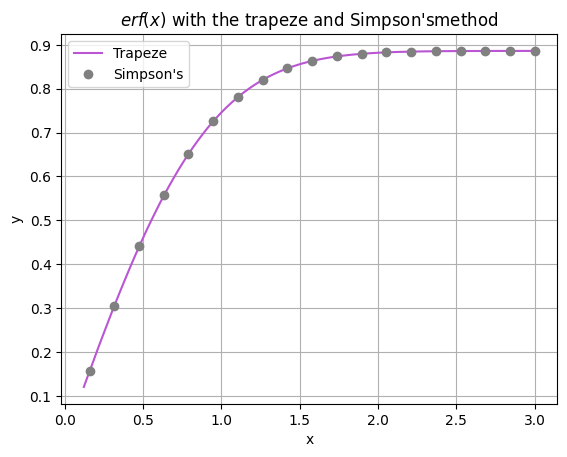

In [50]:
### By trapeze:

def erf(x):

    def f(t):
        return np.exp(-t**2)
    
    I = [I_trapeze(f, 0, xp, int((xp-0)/0.1)) for xp in x]
    return I

x1 = np.linspace(0, 3, 100)
y1 = erf(x1)

### By Simpson's:

def erf(x):

    def f(t):
        return np.exp(-t**2)
    
    I = [I_simpson(f, 0, xp, int((xp-a)/0.1)) for xp in x]
    return I

x2 = np.linspace(0, 3, 20)
y2 = erf(x2)

plt.plot(x1, y1, color = 'mediumorchid')
plt.plot(x2, y2, 'o', color = 'gray')
plt.title('$erf(x)$ with the trapeze and Simpson\'smethod')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Trapeze', 'Simpson\'s'])
plt.show()

### Example: the diffraction limit of a telescope

The main factor that limits the resolution of an optical system is associated with the phenomenon of diffraction and is known as the diffraction limit. When light coming from a star passes through the circular aperture of a telescope, it produces a diffraction pattern consisting of a central spot surrounded by concentric rings, the so-called Airy pattern.


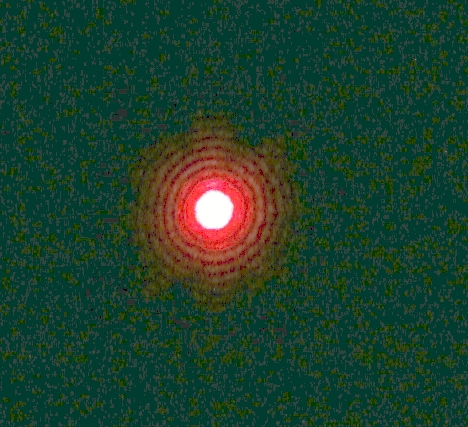

In [51]:
display(Image(filename ="airy_rings.jpg", width=400, height=400))

The light intensity in the diffraction pattern (Fraunhofer diffraction) is given by:

$$I(r)=\left(\frac{J_1(k\,r)}{ k\,r}\right)^2,\quad k=2\pi/\lambda,$$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $\lambda$ is the wavelength of the light, and $J_m(x)$ is the Bessel function, defined by:

$$J_m(x)=\frac{1}{\pi}\int\limits_0^\pi{\cos\left(m\,\theta-x\,\sin\,\theta\right)\,\text{d}\theta}.$$

where $J_1(x)$ satisfies: $\lim_{x\to0}J_1(x)/x=1/2.$ 

1- Write a function that computes the value of the Bessel function using Simpson's rule with N=1000.  

2- Plot on the same graph the Bessel functions $J_0$, $J_1$, $J_2$, and $J_3$ as functions of x over the interval $[0,50]$.  

3- Write a second program that generates a density plot on a 100x100 grid of the intensity of a circular pattern from a light source with $\lambda = 500$ nm on a grid covering values of $r$ up to $1 \mu m$.


In [52]:
def Jm(m, x):
    def g(t):
        return np.cos(m*t -x*np.sin(t))
    result = I_simpson(g, 0, math.pi, 1000)
    return result/math.pi

x = np.linspace(0, 5, 100)
J1 = Jm(1, x)

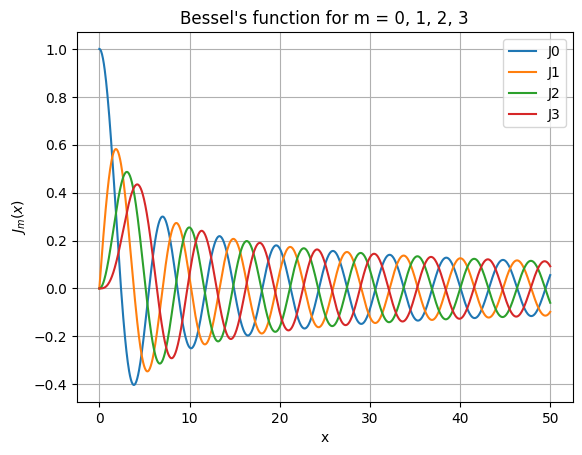

In [53]:
x = np.linspace(0, 50, 1000)
J0, J1, J2, J3 = Jm(0, x), Jm(1, x), Jm(2, x), Jm(3, x)

plt.plot(x, J0)
plt.plot(x, J1)
plt.plot(x, J2)
plt.plot(x, J3)
plt.title('Bessel\'s function for m = 0, 1, 2, 3')
plt.xlabel('x')
plt.ylabel('$J_m(x)$')
plt.legend(['J0', 'J1', 'J2', 'J3'])
plt.grid()

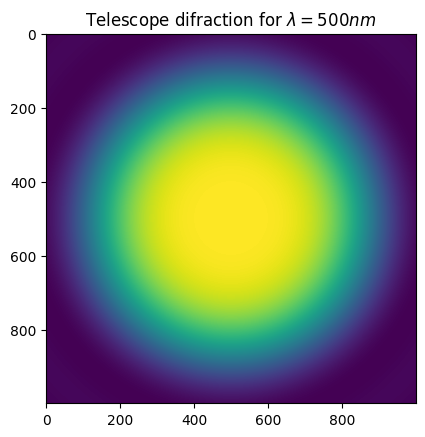

In [54]:
def I(r):
    lam = 500e-9
    k = 2*math.pi/lam
    return (Jm(1, k*r)/(k*r))**2

N = 101
r = np.linspace(-5e-4, 5e-4, 1000)
x, y = np.meshgrid(r, r)
plt.imshow(I(x**2 + y**2))
plt.title('Telescope difraction for $\lambda = 500 nm$')
plt.show()

The calculation error for Simpson's method is given by:

$$\epsilon_\text{simp}=\frac{h^4}{90}\left(f'''(a)-f'''(b)\right).$$

---

### Romberg Method.

It is based on the trapezoidal method. The algorithm is as follows:

1. Compute the first two estimates of the integral using the trapezoidal rule: $I_1 \equiv R_{1,1}$ and $I_2\equiv R_{2,1}$.

2. Compute $R_{2,2}$ from them.

3. Use the trapezoidal rule to obtain $I_3\equiv R_{3,1}$, and from there, $R_{3,2}$ and $R_{3,3}$.

4. For each subsequent stage, compute $I_i\equiv R_{i,1}$, and from there the sequence $R_{i,2}\cdots R_{i,i}$.

5. For each estimate, the error is known, which allows stopping the sequence once the target precision has been reached.    

|     |     |     |     |     |     |     | |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $I_1\equiv R_{1,1}$ | | | | | | |
| $\qquad$ | $\searrow$| | | | | | |
| $I_2\equiv R_{2,1}$ |$\to$|$R_{2,2}$  | | | | | |
| $\qquad$ | $\searrow$| | $\searrow$ | | | | |
| $I_3\equiv R_{3,1}$ |$\to$|$R_{3,2}$  |$\to$ |$R_{3,3}$ | | | |
| $\qquad$ | $\searrow$| | $\searrow$ | |$\searrow$ | | |
| $I_4\equiv R_{4,1}$ |$\to$|$R_{4,2}$  |$\to$ |$R_{4,3}$ |$\to$ | $R_{4,4}$| |
| $\qquad$ | $\searrow$| | $\searrow$ | |$\searrow$ | |$\searrow$ |

---

### Example: integrating with adaptive step.

$$I=\int\limits_0^1\,\sin^2{\sqrt{ 100\,x}}\,\text{d}x.$$

1. Write a program that uses the trapezoidal method with adaptive step to compute the
value of the integral with an approximate precision of $\epsilon =10^{-6}$.  
   Start with a single interval and double the number of intervals in each iteration.  
   In each iteration, print the number of intervals, the integral estimate, and its error.  

2. Modify the program to evaluate the integral using Romberg's method with the same precision.  

3. Solve the same integral now using Simpson's method with adaptive step.  

4. Compare the precision of each method for the same number of intervals.


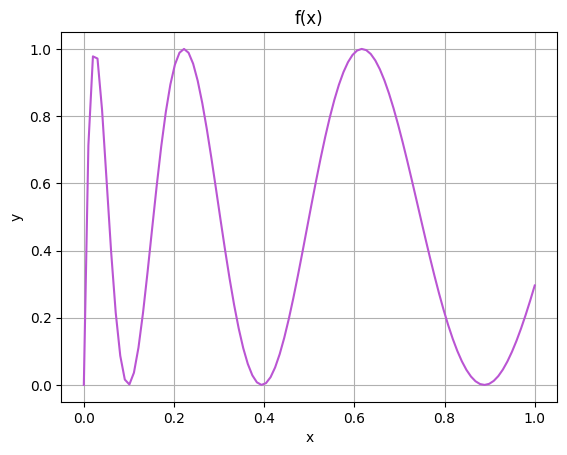

In [55]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

x = np.linspace(0, 1, 100)
plt.plot(x, f(x), color = 'mediumorchid')
plt.title('f(x)')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [56]:
def I_adapted_trapeze(f, a, b, E):
    N = 1
    h = (b - a)/N
    I1 = I_trapeze(f, a, b, N)
    eps = 1
    it = 1

    while eps > E:
        h /= 2
        I2 = 0
        for k in range(N):
            I2 += f(a + (2*k + 1)*h)
        I2 = I1/2 + h*I2
        eps = abs(I2 - I1)/3
        it += 1
        I1 = I2
        N *= 2
        print(f'Iterations: {it} | N = {N} | I = {I1} | eps = {eps} |')
    return I1

I_adapted_trapeze(f, 0, 1, 1e-6)

Iterations: 2 | N = 2 | I = 0.3252319078064746 | eps = 0.05908414108660753 |
Iterations: 3 | N = 4 | I = 0.5122828507233315 | eps = 0.06235031430561896 |
Iterations: 4 | N = 8 | I = 0.4029974484782483 | eps = 0.03642846741502772 |
Iterations: 5 | N = 16 | I = 0.43010336929474696 | eps = 0.009035306938832885 |
Iterations: 6 | N = 32 | I = 0.4484146657874699 | eps = 0.0061037654975743165 |
Iterations: 7 | N = 64 | I = 0.4539129312153758 | eps = 0.0018327551426352933 |
Iterations: 8 | N = 128 | I = 0.45534850437280205 | eps = 0.000478524385808754 |
Iterations: 9 | N = 256 | I = 0.455711266453241 | eps = 0.00012092069347964991 |
Iterations: 10 | N = 512 | I = 0.45580219965166413 | eps = 3.0311066141042176e-05 |
Iterations: 11 | N = 1024 | I = 0.45582494813241997 | eps = 7.582826918613635e-06 |
Iterations: 12 | N = 2048 | I = 0.4558306362016466 | eps = 1.8960230755427077e-06 |
Iterations: 13 | N = 4096 | I = 0.455832058278271 | eps = 4.74025541467397e-07 |


np.float64(0.455832058278271)

In [57]:
def I_adapted_simpson(f, a, b, E):
    N = 2
    h = (b - a)/N
    S = (f(a) + f(b))/3
    T = 2*f(a+h)/3
    I1 = h*(S + 2*T)
    eps = 1.
    it = 1

    while eps > E:
        h /= 2
        S += T
        T = 0
        for k in range(N):
            T += 2*f(a + (2*k + 1)*h)/3
        I2 = h*(S + 2*T)
        eps = abs(I2 - I1)/15
        it += 1
        I1 = I2
        N *= 2
        print(f'Iterations: {it} | N = {N} | I = {I1} | eps = {eps} |')
    return I1

I_adapted_simpson(f, 0, 1, 1.0e-6)

Iterations: 2 | N = 4 | I = 0.5746331650289503 | eps = 0.012687807742391215 |
Iterations: 3 | N = 8 | I = 0.36656898106322056 | eps = 0.013870945597715319 |
Iterations: 4 | N = 16 | I = 0.4391386762335798 | eps = 0.004837979678023951 |
Iterations: 5 | N = 32 | I = 0.45451843128504416 | eps = 0.0010253170034309552 |
Iterations: 6 | N = 64 | I = 0.45574568635801116 | eps = 8.181700486446694e-05 |
Iterations: 7 | N = 128 | I = 0.45582702875861064 | eps = 5.422826706632152e-06 |
Iterations: 8 | N = 256 | I = 0.4558321871467207 | eps = 3.4389254066994704e-07 |


np.float64(0.4558321871467207)

In [58]:
def I_romberg(f, a, b, E):
    N = 1
    h = (b - a)/N
    I1 = h/2*(f(a) + f(b))
    R1 = np.array([I1], float)
    eps = 1.
    it = 1

    while eps > E:
        h /= 2
        I2 = 0
        for k in range(N):
            I2 += f(a + (2*k + 1)+h)
        I2 = I1/2 + h*I2
        it +=1
        R2 = np.empty(it, float)
        R2[0] = I2

        for m in range(1, it):
            eps = abs(R2[m-1] - R1[m-1])/(4**m-1)
            R2[m] = R2[m-1] + eps
        N *= 2
        I1 = I2
        R1 = R2
        print(f'Iterations: {it} | N = {N} | I = {I1} | eps = {eps} |')

I_romberg(f, 0, 1, 1e-6)

Iterations: 2 | N = 2 | I = 0.12314435111862224 | eps = 0.008278377809343254 |
Iterations: 3 | N = 4 | I = 0.4372265799532404 | eps = 0.027366528486898734 |
Iterations: 4 | N = 8 | I = 0.6022208159247797 | eps = 0.001517750144237807 |
Iterations: 5 | N = 16 | I = 0.7032615929092931 | eps = 0.0003022012538942461 |
Iterations: 6 | N = 32 | I = 0.6588552042242811 | eps = 6.318203552399665e-05 |
Iterations: 7 | N = 64 | I = 0.6060399128286562 | eps = 1.2497477192376699e-05 |
Iterations: 8 | N = 128 | I = 0.5660756065610337 | eps = 2.7323779485326507e-06 |
Iterations: 9 | N = 256 | I = 0.5402792204137356 | eps = 4.838919433789306e-07 |


### Gaussian Quadrature Function.

It makes use of Lagrange interpolators to obtain an integration rule that is exact for polynomials of degree 2N - 1, where N is the number of points at which the function is evaluated.

---


In [59]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3, 4*N-1, N)/(4*N + 2)
    x = np.cos(np.pi*a + 1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def f(x):
    return x**4-2*x+1


x,w=gaussxwab(3,0,2)
s=0
for i in range(0,3):
    s+=w[i]*f(x[i])
print(s)

4.4000000000000075


### Exercise: heat capacity of a solid.

- According to Debye's theory, the heat capacity of a solid at a temperature $T$ is given by:
<br/>

    $$C_V=9\,V\rho\,k_B\left(\frac{T}{\theta_D}\right)^3\int\limits_0^{\theta_D\,/\,T}{\frac{x^4\,\text{e}^x}{\left(\text{e}^x-1\right)^2}\,\text{d}x},$$

     - with $V$ the volume of the solid, 
     
     - $\rho$ the number density of the material, 
     
     - $k_B=1.38065\cdot 10^{-23}$ J/K the Boltzmann constant,
     
     - $\theta_D$ the Debye temperature, which depends on the temperature and the speed of sound in the material. 
     
1. Write a program that computes $C_V$ as a function of $T$ for a 1000 $\text{cm}^3$ sample of aluminum, whose number density is $\rho=6.022\times 10^{28}$ $\text{m}^{-3}$ and $\theta_D=428$ K. Use Gaussian quadrature with N=50.  

2. Use the function to plot the heat capacity of aluminum for temperatures between 5 and 500 K.


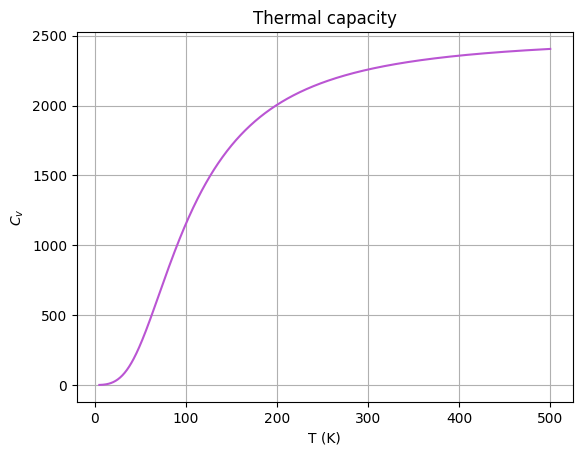

In [60]:
def Cv(T):
    V, rho, k, t = 0.001, 6.022e28, 1.38065e-23, 428
    N = 50
    
    x, w = gaussxwab(N, 0, t/T)
    
    def f(x):
        return (x**4)*np.exp(x)/((np.exp(x)-1)**2)
    
    s=0
    for i in range(N):
        s+=w[i]*f(x[i])
    return s*9*V*rho*k*(T/t)**3

T = np.linspace(5, 500, 1000)
y = list(map(Cv, T))

plt.plot(T, y, color = 'mediumorchid')
plt.title('Thermal capacity')
plt.xlabel('T (K)')
plt.ylabel('$C_{v}$')
plt.grid()
plt.show()

## Integrals over infinite ranges.

- An integral over the range $[0,\infty]$ can be expressed as another over the range $[0,1]$ through:

    $$z=\frac{x}{x+1}\quad\Rightarrow\quad x=\frac{z}{1-z},\quad dx=\frac{\text{d}z}{(1-z)^2}$$

   which allows us to write:

    $$\int\limits_0^\infty\,f(x)\,\text{d}x = \int\limits_{0}^1\frac{1}{(1-z)^2}\,f\left(\frac{z}{1-z}\right)\,\text{d}z,$$

    and therefore study it using the techniques we have seen so far.

- Similarly, an integral over the range $[-\infty,0]$ can be expressed as another over $[0,1]$ taking into account that: 

$$\int\limits_{-\infty}^0\,f(x)\,\text{d}x = \int\limits_0^{\infty}\,f(-x)\,\text{d}x =  \int\limits_{0}^1\frac{1}{(1-z)^2}\,f\left(\frac{z}{z-1}\right)\,\text{d}z.$$

---

- Equivalently, an integral over the range $[a,\infty]$ can also be written as another over $[0,1]$ using the change of variable:

    $$z=\frac{x-a}{x-a+1}\quad\Rightarrow\quad x=\frac{z}{1-z}+a,\quad dx=\frac{- \text{d}z}{(1-z)^2}$$

   so that

    $$\int\limits_a^\infty\,f(x)\,\text{d}x = \int\limits_{0}^1\frac{1}{(1-z)^2}\,f\left(\frac{z}{1-z}+a\right)\,\text{d}z,$$

- Similarly, an integral over $[-\infty,b]$ is given by:

$$\int\limits_{-\infty}^b\,f(x)\,\text{d}x = \int\limits_{-b}^{\infty}\,f(-x)\,\text{d}x =  \int\limits_{0}^1\frac{1}{(1-z)^2}\,f\left(\frac{z}{z-1}+b\right)\,\text{d}z.$$

---

- To solve integrals over the range $[-\infty,\infty]$ we can split the interval into two, $[-\infty,a]$ and $[a,\infty]$,  
  applying the previous changes of variable to each.

- Another option is to use the change of variable   

    $$x=\frac{z}{1-z^2},\quad dx=\frac{1+z^2}{(1-z^2)^2}\text{d}z,$$

  which leads to the integral
  
     $$\int\limits_{-\infty}^\infty\,f(x)\,\text{d}x = \int\limits_{-1}^1\frac{1+z^2}{(1-z^2)^2}\,f\left(\frac{z}{1-z^2}\right)\,\text{d}z.$$
 
- Another option is:
 
    $$x=\tan\,z,\quad dx=\frac{\text{d}z}{\cos^2z},$$
 
  which allows expressing:

 $$\int\limits_{-\infty}^\infty\,f(x)\,\text{d}x = \int\limits_{-\pi/2}^{\pi/2}\frac{f\left(\tan z\right)}{ \cos^2z}\,\text{d}z.$$

---

### Example: integrating the Gaussian.

Solve the Gaussian integral, defined by:

 $$\int\limits_{-\infty}^\infty\,\text{e}^{-x^2}\,\text{d}x =\sqrt \pi$$

using Gaussian quadrature with 50 points.


In [61]:
def f(x):
    return np.exp(-x**2)

def g(z):
    return f(np.tan(z))/(np.cos(z)**2)

N = 50
x, w = gaussxwab(N, -np.pi/2, np.pi/2)

s = 0
for i in range(N):
    s += w[i]*g(x[i])

print(s)
print(np.sqrt(np.pi))

1.7724538504387108
1.7724538509055159


## Multiple Integrals.

- Integrals over more than one variable are very common in physics.  

- Let us consider as a starting point a double integral over a rectangle.

    $$I=\int\limits_{a_1}^{b_1}\int\limits_{a_2}^{b_2}\,f(x,y)\;\text{d}x\,\text{d}y$$

- It can be solved with the techniques we have seen so far, taking into account that:

   \begin{align}
       F(y)=&\int\limits_{a_2}^{b_2}\,f(x,y)\;\text{d}x,\\
       I=&\int\limits_{a_1}^{b_1}\,F(y)\;\text{d}y,\\
   \end{align}

    that is, one way to solve multiple integrals is to first evaluate $F(y)$, and then use those values to integrate the full function.  

- Using, for example, Gaussian quadrature, we have:

    $$F(y)\simeq \sum_{i=1}^N\,w_i\,f(x_i,y),\quad I\simeq \sum_{j=1}^N\,w_j F(y_j)\quad\Rightarrow\quad I\simeq \sum_{i=1}^N\sum_{j=1}^N\,w_i\,w_j\,f(x_i,y_j),$$

    which is the so-called Gauss-Legendre product formula, the two-dimensional Gaussian quadrature.

---

### Example: gravitational attraction of a metal sheet.

A square metal sheet with 10 m sides, negligible thickness, and a mass of 10 tons is at rest in space.

1. Compute the gravitational force along the vertical axis that the sheet exerts on a 1 kg particle located at a vertical distance $z$ from the center of the sheet.  

2. Write a program that computes and plots the force as a function of distance, for values in the interval $z=[0,10]$ m.  
   For the double integral, use double Gaussian quadrature with 100 points along each axis.  

3. You should obtain a very smooth curve, except for very small values of $z$, for which the force decreases rapidly to zero.  
   This decrease is not physical, but an artifact of the way we have calculated the force.  
   Explain the origin of this artifact and how it can be eliminated or reduced.


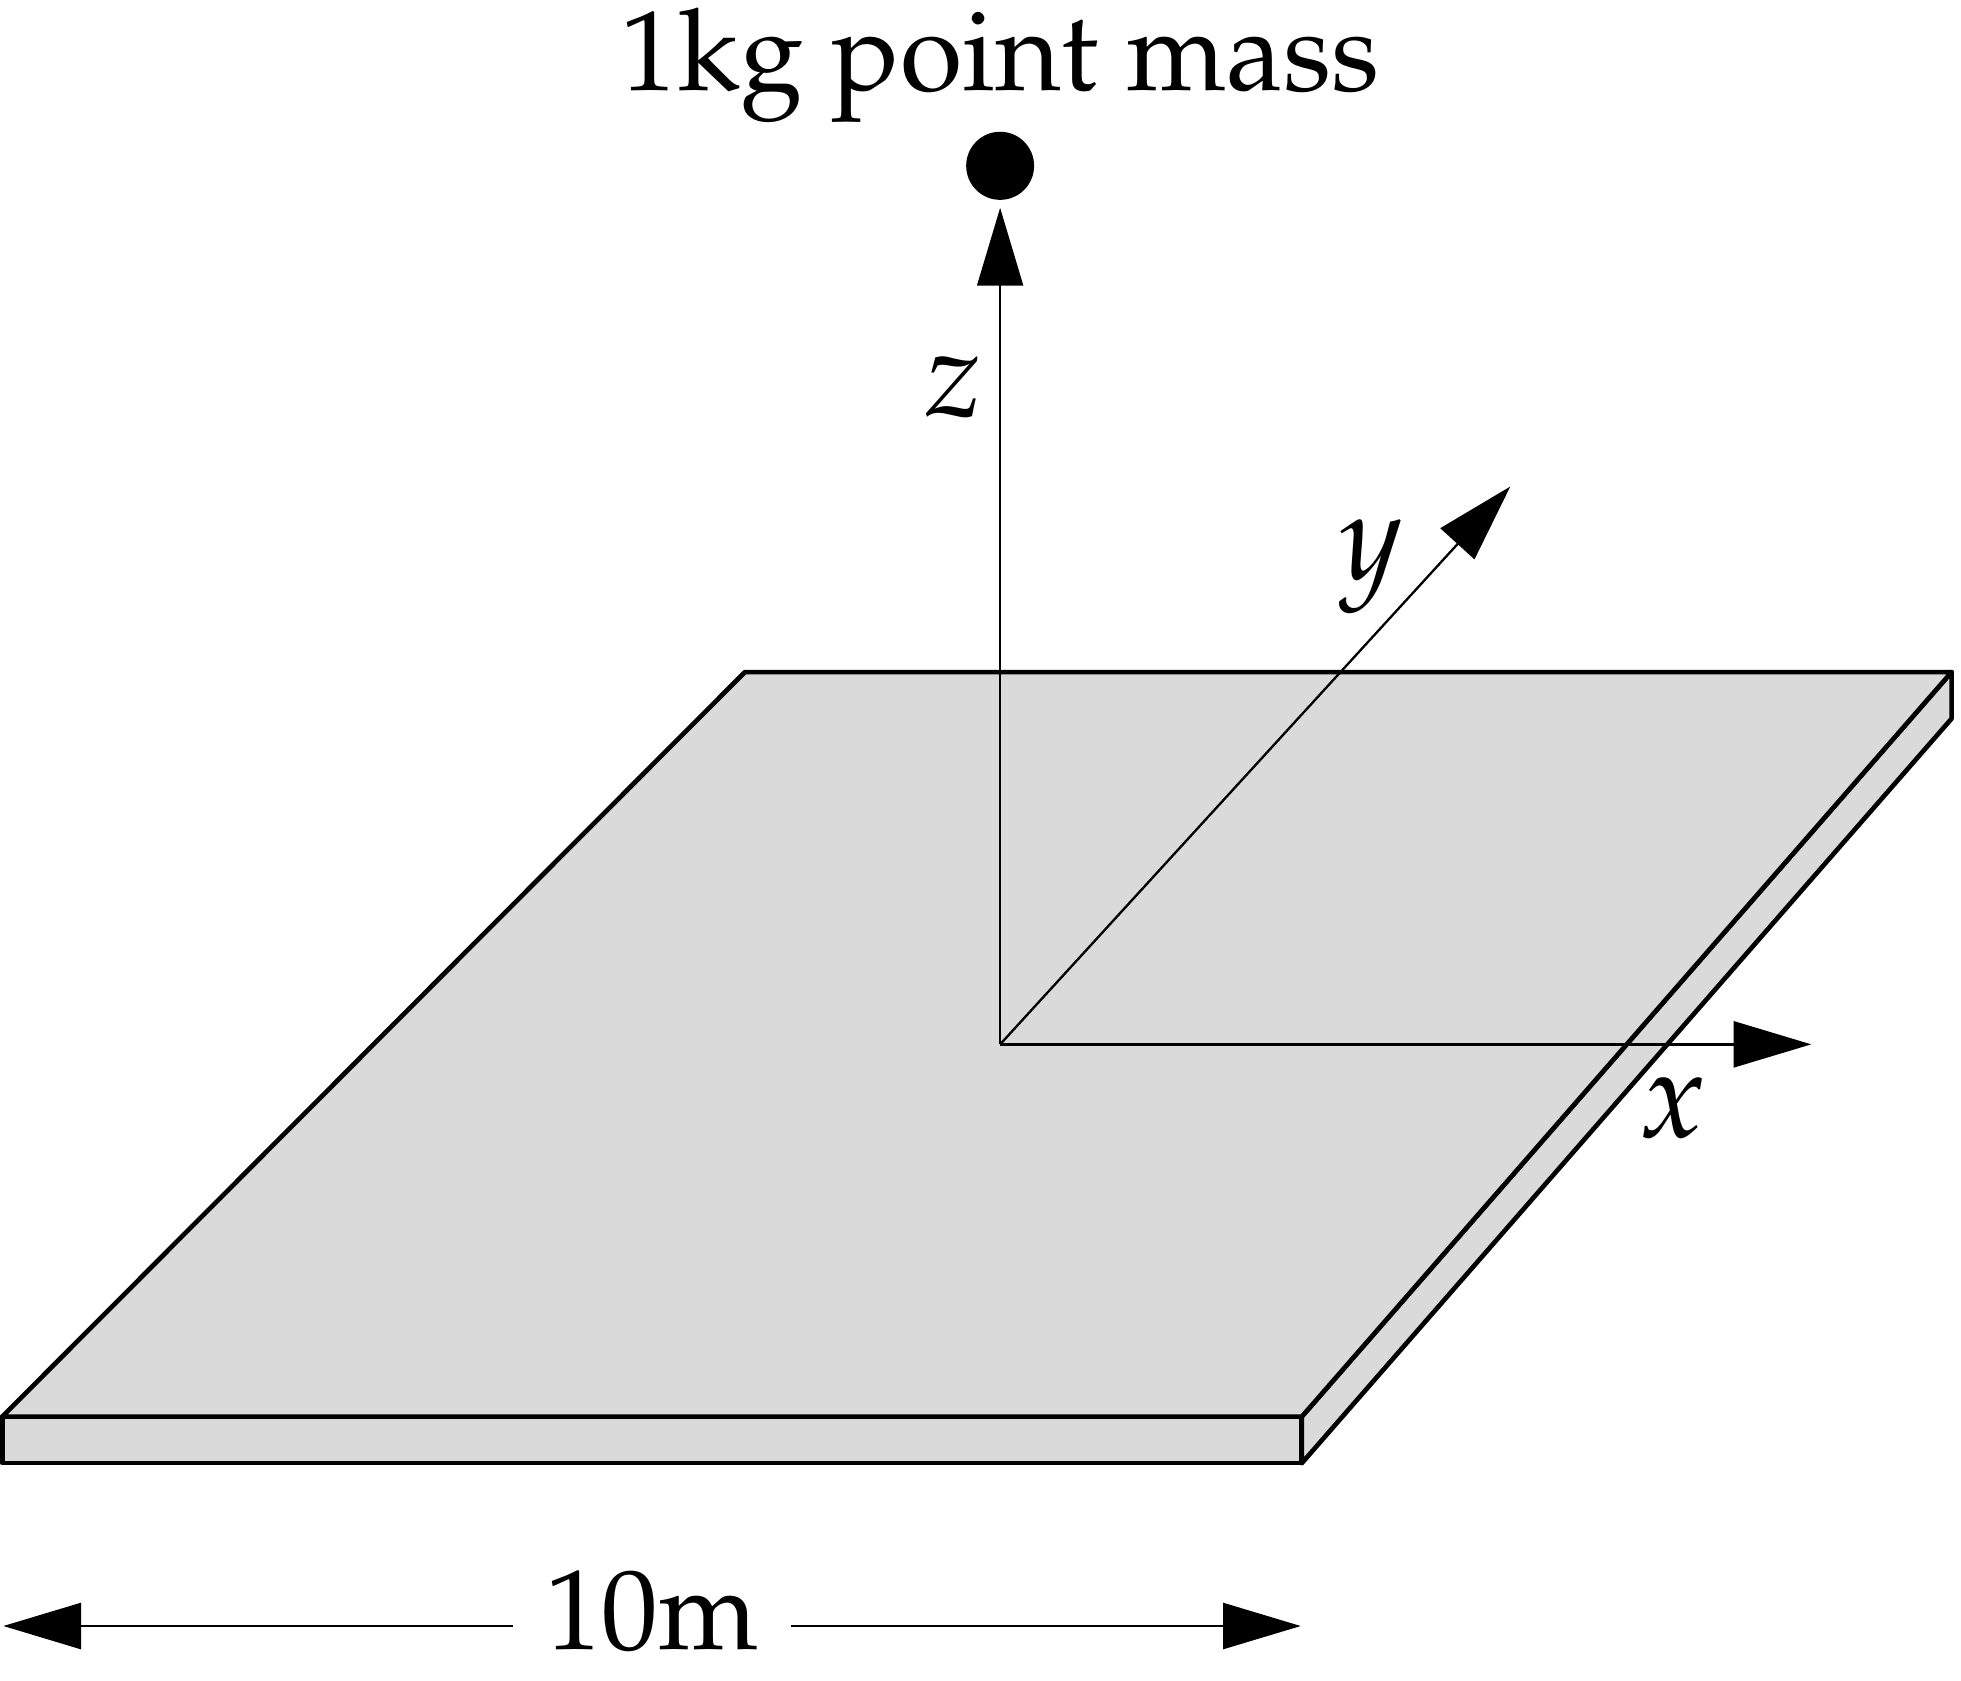

In [62]:
display(Image(filename="gravitacion_lamina.png", width=450, height=450))

1. The surface element $\text{d}x\,\text{d}y$ has a mass $\rho \,\text{d}x\,\text{d}y$, where $\rho$ is the area density of the sheet.  
   The distance between this surface element and the particle is $r=\sqrt{x^2+y^2+z^2}$, whose projection along the z-axis is $z/r$.  
   Therefore, the gravitational force exerted by this surface element on the particle along the z-axis is:

   $$d\vec F_z = \frac{G\,\rho \,\text{d}x\,\text{d}y}{r^2}\vec u_z=\frac{G\,\rho\,z \,\text{d}x\,\text{d}y}{r^3}\, $$

   with $G=6.674\,10^{-11}$ Kg $m^3$ $s^{-2}$. Integrating, the total force exerted by the plate is:

   $$F_z=G\,\rho\,z\int\limits_{-L/2}^{L/2}
   \int\limits_{-L/2}^{L/2}\frac{\text{d}x\,\text{d}y}{(x^2+y^2+z^2)^{3/2}}.$$


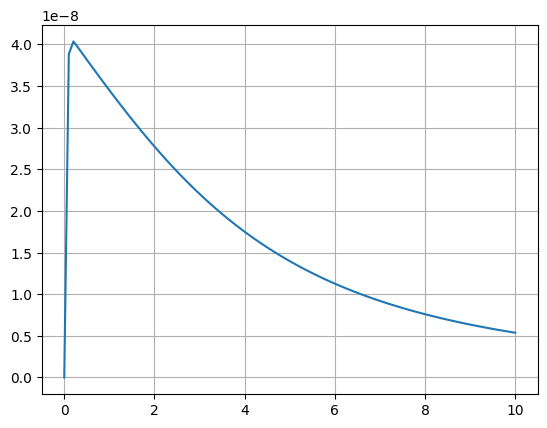

In [63]:
def gravlam(L1, L2, M, m, N, z):
    rho = M/(L1*L2)
    G = 6.674e-11
    
    x, wx = gaussxwab(N, -L1/2, L1/2)
    y, wy = gaussxwab(N, -L2/2, L2/2)
    
    def fuerza(x, y, z):
        return m/((x**2+y**2+z**2)**(3/2))

    s = 0
    for i in range(N):
        for j in range(N):
            s += wx[i]*wy[j]*fuerza(x[i], y[j], z)
    return G*rho*z*s


z = np.linspace(0,10,100)
y = []
for k in range(len(z)):
    y.append(gravlam(10, 10, 10000, 1, 100, z[k]))
plt.plot(z,y)
plt.grid()
plt.show()